# 1.Importing necessary libraries and dataset

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.signal import spectrogram


## IMPORT DATASET

# 1.  DataCollection
    

In [4]:
dataset = "/content/AdidasSalesdata.xlsx"
sales = pd.read_excel(dataset)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
sales.head(20)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2021-10-26,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
1,Foot Locker,1185732,2021-10-27,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
2,Foot Locker,1185732,2021-10-28,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,45,475,213750.0,117562.5,0.55,Outlet
3,Foot Locker,1185732,2021-10-29,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,45,125,56250.0,19687.5,0.35,Outlet
4,Foot Locker,1185732,2021-10-30,Northeast,Pennsylvania,Philadelphia,Women,Street Footwear,35,175,61250.0,24500.0,0.40,Outlet
5,Foot Locker,1185732,2021-10-31,Northeast,Pennsylvania,Philadelphia,Women,Athletic Footwear,40,50,20000.0,8000.0,0.40,Outlet
6,Foot Locker,1185732,2021-11-01,Northeast,Pennsylvania,Philadelphia,Men,Apparel,55,125,68750.0,24062.5,0.35,Outlet
7,Foot Locker,1185732,2021-11-02,Northeast,Pennsylvania,Philadelphia,Women,Apparel,45,225,101250.0,30375.0,0.30,Outlet
8,Foot Locker,1185732,2021-11-03,Northeast,Pennsylvania,Philadelphia,Men,Street Footwear,50,445,222500.0,122375.0,0.55,Outlet
9,Foot Locker,1185732,2021-11-04,Northeast,Pennsylvania,Philadelphia,Men,Athletic Footwear,50,150,75000.0,26250.0,0.35,Outlet


In [ ]:
sales.tail()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Gender Type,Product Category,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
9643,West Gear,1128299,2020-03-14,West,Nevada,Las Vegas,Women,Apparel,56,170,9520.0,1713.60,0.18,Outlet
9644,West Gear,1128299,2020-03-15,West,Nevada,Las Vegas,Men,Street Footwear,20,149,2980.0,1192.00,0.40,Outlet
9645,West Gear,1128299,2020-03-16,West,Nevada,Las Vegas,Men,Athletic Footwear,31,145,4495.0,1123.75,0.25,Outlet
9646,West Gear,1128299,2020-03-17,West,Nevada,Las Vegas,Women,Street Footwear,26,128,3328.0,1397.76,0.42,Outlet
9647,West Gear,1128299,2020-03-18,West,Nevada,Las Vegas,Women,Athletic Footwear,26,96,2496.0,848.64,0.34,Outlet


# 2. Data Inspection

In [ ]:
sales.shape

(9648, 14)

In [ ]:
sales.columns

Index(['Retailer', 'Retailer ID', 'Invoice Date', 'Region', 'State', 'City',
       'Gender Type', 'Product Category', 'Price per Unit', 'Units Sold',
       'Total Sales', 'Operating Profit', 'Operating Margin', 'Sales Method'],
      dtype='object')

In [ ]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Gender Type       9648 non-null   object        
 7   Product Category  9648 non-null   object        
 8   Price per Unit    9648 non-null   int64         
 9   Units Sold        9648 non-null   int64         
 10  Total Sales       9648 non-null   float64       
 11  Operating Profit  9648 non-null   float64       
 12  Operating Margin  9648 non-null   float64       
 13  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), fl

## DATA CLEANING

In [ ]:
#Correcting Data Types

 # Convert 'Invoice Date' to datetime format
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'], errors='coerce')

# Convert categorical columns to category type for memory efficiency
categorical_cols = ['Retailer', 'Region', 'State', 'City', 'Gender Type', 'Product Category', 'Sales Method']
sales[categorical_cols] = sales[categorical_cols].astype('category')


In [ ]:
# Removing Duplicates

sales = sales.drop_duplicates()
print("Data shape after removing duplicates:", sales.shape)


Data shape after removing duplicates: (9648, 14)


In [ ]:
sales.isnull().sum()

,0
Retailer,0
Retailer ID,0
Invoice Date,0
Region,0
State,0
City,0
Gender Type,0
Product Category,0
Price per Unit,0
Units Sold,0


In [ ]:

sales.describe()

,Retailer ID,Invoice Date,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9.648000e+03,9648,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,2021-05-10 15:20:44.776119552,45.216625,256.930037,93273.437500,34425.244761,0.422991
min,1.128299e+06,2020-01-01 00:00:00,7.000000,0.000000,0.000000,0.000000,0.100000
25%,1.185732e+06,2021-02-17 00:00:00,35.000000,106.000000,4254.500000,1921.752500,0.350000
50%,1.185732e+06,2021-06-04 00:00:00,45.000000,176.000000,9576.000000,4371.420000,0.410000
75%,1.185732e+06,2021-09-16 00:00:00,55.000000,350.000000,150000.000000,52062.500000,0.490000
max,1.197831e+06,2021-12-31 00:00:00,110.000000,1275.000000,825000.000000,390000.000000,0.800000
std,2.636038e+04,NaN,14.705397,214.252030,141916.016727,54193.113713,0.097197


## EDA(Exploratory Data Analysis)


## 1.Top 5 States  With Highest Total Sales

In [ ]:
top_states = sales.groupby('State')['Total Sales'].sum().nlargest(5)
print(top_states)


State
New York          64229039.0
California        60174133.0
Florida           59283714.0
Texas             46359746.0
South Carolina    29285637.0
Name: Total Sales, dtype: float64


# 2. Sales By Product Category

In [ ]:
category_sales = sales.groupby('Product Category')['Total Sales'].sum()
print(category_sales)

Product Category
Apparel              302767492.0
Athletic Footwear    260305576.0
Street Footwear      336829057.0
Name: Total Sales, dtype: float64


# 3. Price per Unit vs. Units Sold

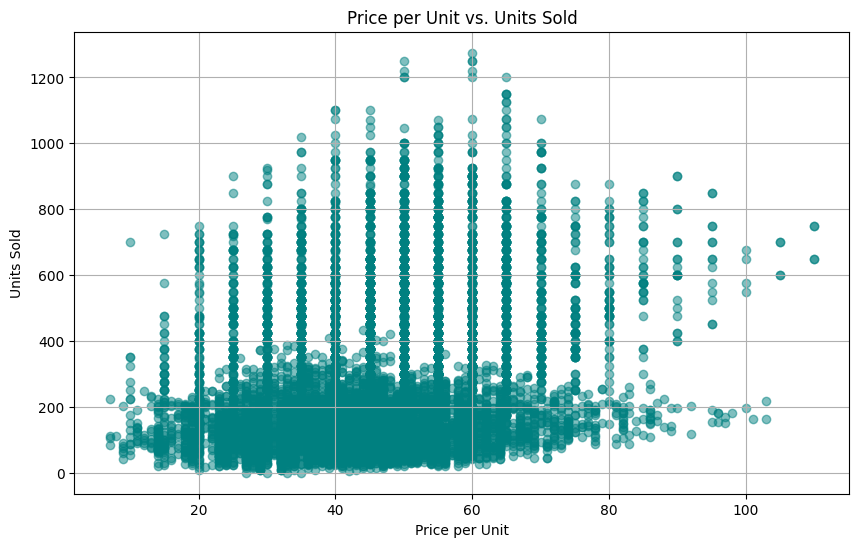

In [ ]:
 #SCATTER PLOT
plt.figure(figsize=(10, 6))
plt.scatter(sales['Price per Unit'], sales['Units Sold'], color='teal', alpha=0.5)
plt.title('Price per Unit vs. Units Sold')
plt.xlabel('Price per Unit')
plt.ylabel('Units Sold')
plt.grid(True)
plt.show()


# 4.Sales by Gender Type

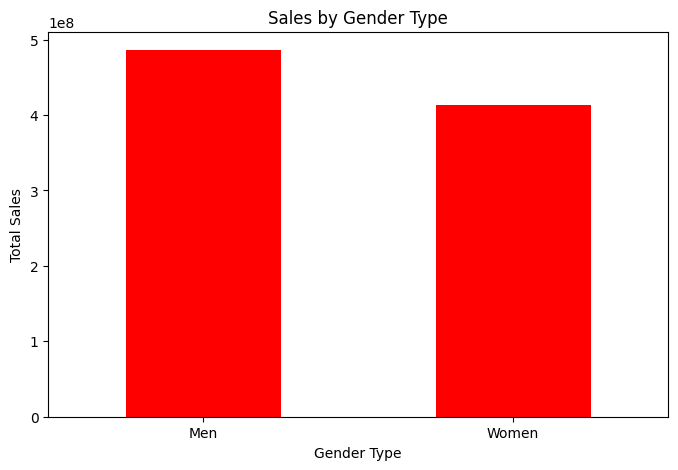

In [ ]:
# Bar Plot
plt.figure(figsize=(8, 5))
gender_sales = sales.groupby('Gender Type')['Total Sales'].sum()
gender_sales.plot(kind='bar', color='red')
plt.title('Sales by Gender Type')
plt.xlabel('Gender Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)
plt.show()


# 5. Units Sold by Region

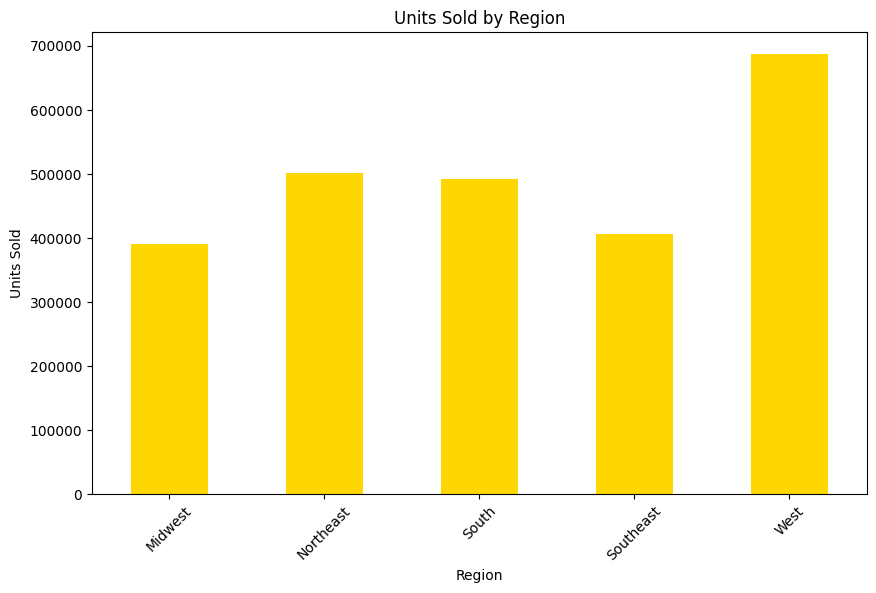

In [ ]:
#Bar plot
plt.figure(figsize=(10, 6))
region_units_sold = sales.groupby('Region')['Units Sold'].sum()
region_units_sold.plot(kind='bar', color='gold')
plt.title('Units Sold by Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.show()

# 6.Monthly Sales Trend

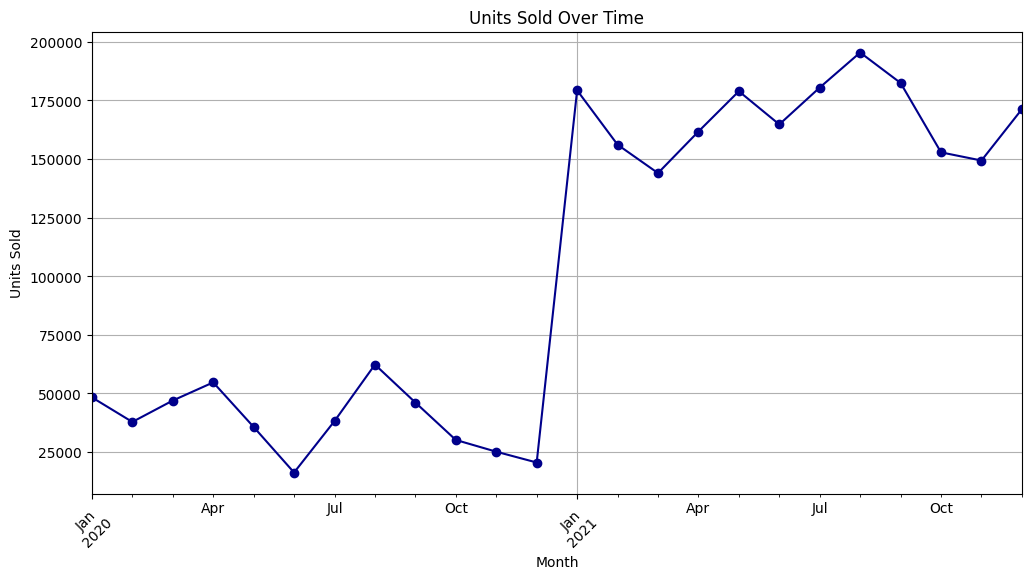

In [ ]:
#Line Plot
plt.figure(figsize=(12, 6))
time_series_units = sales.groupby(sales['Invoice Date'].dt.to_period("M"))['Units Sold'].sum()
time_series_units.plot(kind='line', marker='o', color='darkblue')
plt.title('Units Sold Over Time')
plt.xlabel('Month')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# 7 Correlation heatmap for the Specified Numerical Columns

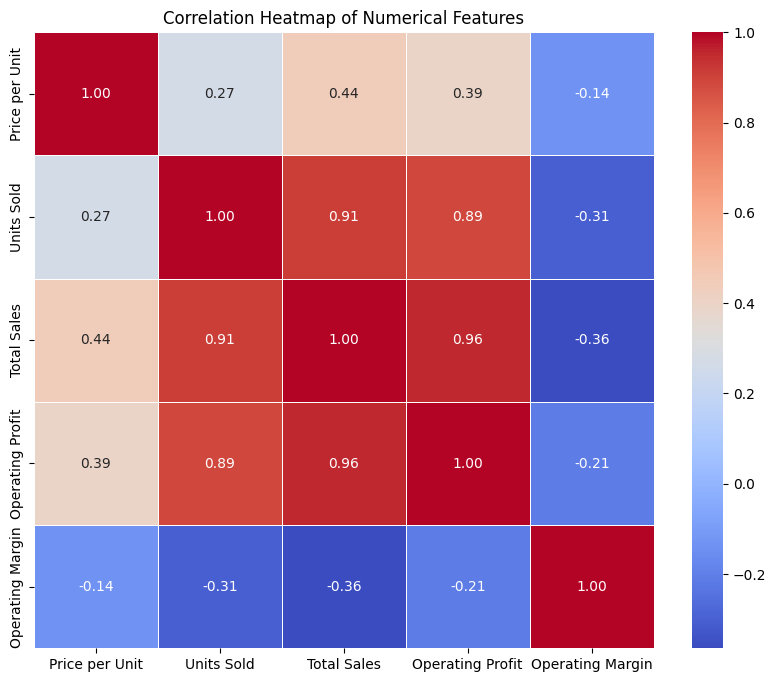

In [ ]:
# Plotting the heatmap
numerical_cols = ['Price per Unit', 'Units Sold', 'Total Sales', 'Operating Profit', 'Operating Margin']
corr = sales[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

# 8.Monthly Sales Heatmap

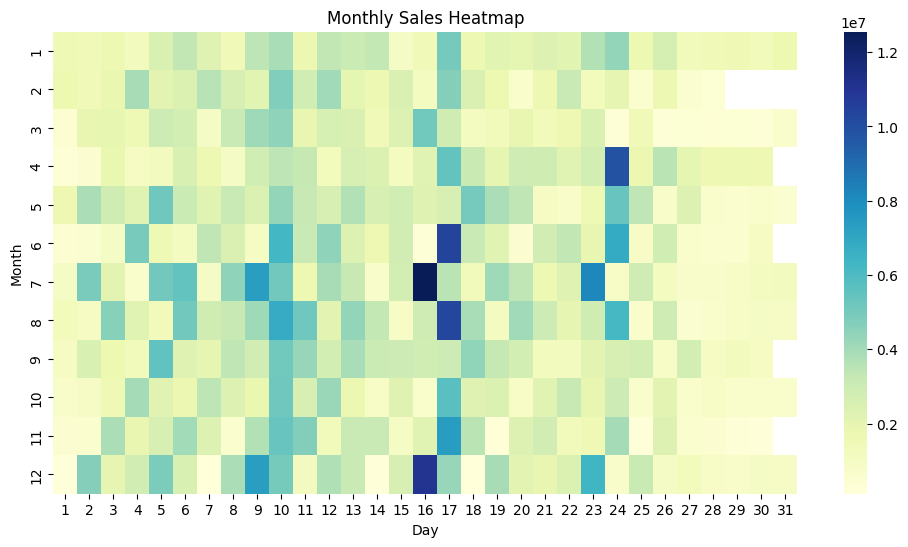

In [ ]:
# Convert 'Invoice Date' to datetime and extract month/day for seasonality analysis
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'])
sales['Month'] = sales['Invoice Date'].dt.month
sales['Day'] = sales['Invoice Date'].dt.day

# Create a pivot table for total sales by day and month
sales_pivot = sales.pivot_table(index='Month', columns='Day', values='Total Sales', aggfunc='sum')

# Plotting the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(sales_pivot, cmap="YlGnBu", annot=False, cbar=True)
plt.title("Monthly Sales Heatmap")
plt.xlabel("Day")
plt.ylabel("Month")
plt.show()


# 9.Sales Distribution by Product Category

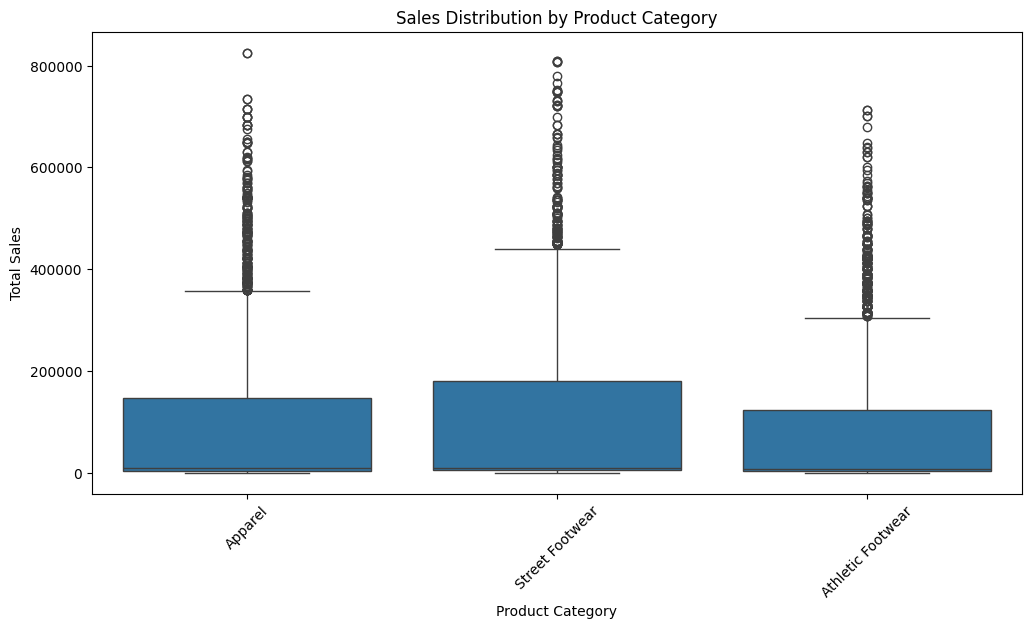

In [ ]:
# Box Plot for Sales Distribution by Product Category

plt.figure(figsize=(12, 6))
sns.boxplot(data=sales, x='Product Category', y='Total Sales')
plt.title("Sales Distribution by Product Category")
plt.xticks(rotation=45)
plt.show()

# 10. Sales Density by Region

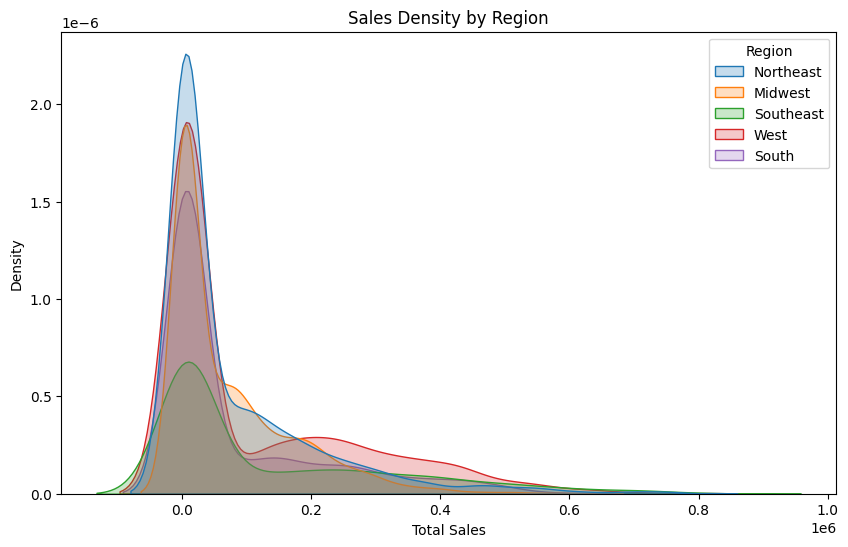

In [ ]:
#kde(Kernel Density Estimate) plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sales, x='Total Sales', hue='Region', fill=True)
plt.title("Sales Density by Region")
plt.show()

# 11. Relationship Between Total Sales and Operating Profit by Product Category

<Figure size 1000x600 with 0 Axes>

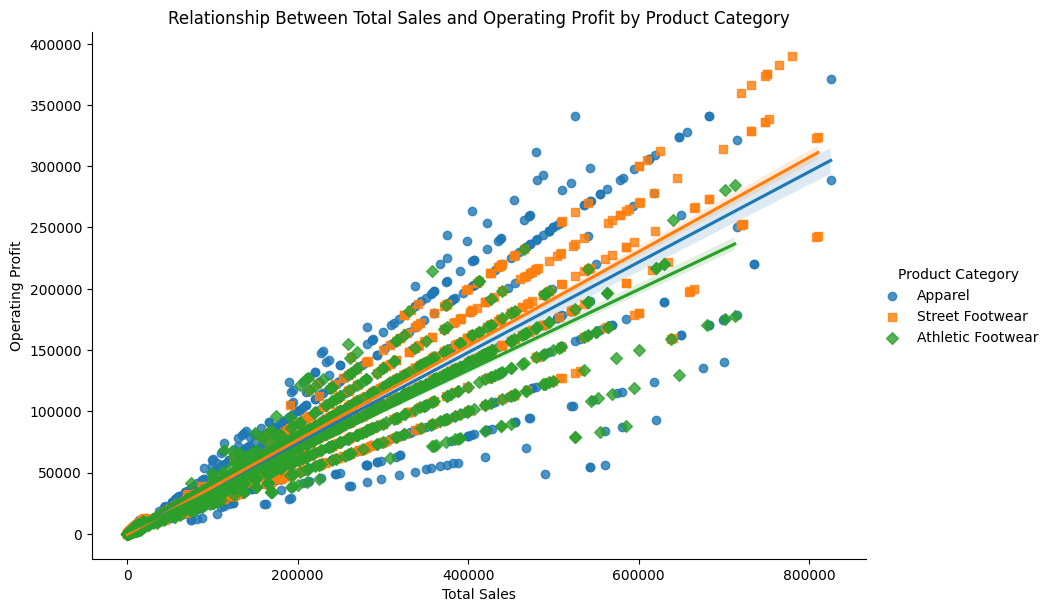

In [ ]:
#Linear Regression line (LM plot)
plt.figure(figsize=(10, 6))
sns.lmplot(data=sales, x='Total Sales', y='Operating Profit', hue='Product Category', height=6, aspect=1.5, markers=["o", "s", "D"])
plt.title("Relationship Between Total Sales and Operating Profit by Product Category")
plt.xlabel("Total Sales")
plt.ylabel("Operating Profit")
plt.show()


#12. Which Region have the Higest Sales Revenue?

In [ ]:
region_sales = sales.groupby('Region')['Total Sales'].sum().sort_values(ascending=False)

highest_sales_region = region_sales.head(1)
print("Region with the highest sales revenue:")
print(highest_sales_region)

Region with the highest sales revenue:
Region
West    269943182.0
Name: Total Sales, dtype: float64


#13. Which State has The Higest Total Profit?

In [ ]:
state_profit = sales.groupby('State')['Operating Profit'].sum().sort_values(ascending=False)

highest_profit_state = state_profit.head(1)
print("State with the highest total profit:")
print(highest_profit_state)

State with the highest total profit:
State
New York    23329824.07
Name: Operating Profit, dtype: float64


# 14. Which Items have the Higest And Lowest Total sales?

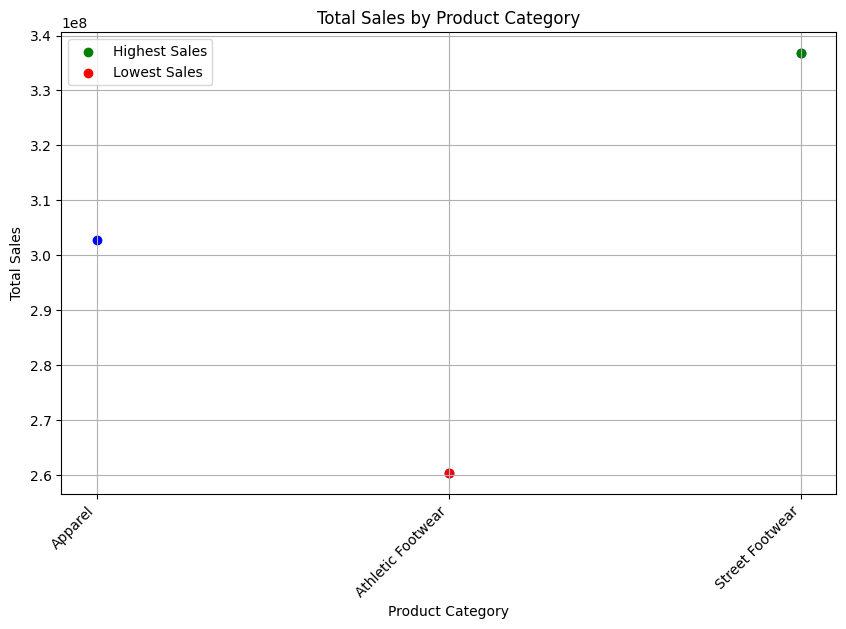

In [ ]:
item_sales = sales.groupby('Product Category')['Total Sales'].sum()
# By Scatter Plot
items = item_sales.index
total_sales = item_sales.values


plt.figure(figsize=(10, 6))
plt.scatter(items, total_sales, color='blue', marker='o')
plt.title('Total Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')
plt.grid(True)


max_sales_item = item_sales.idxmax()
min_sales_item = item_sales.idxmin()
plt.scatter(max_sales_item, item_sales[max_sales_item], color='green', label='Highest Sales')
plt.scatter(min_sales_item, item_sales[min_sales_item], color='red', label='Lowest Sales')

plt.legend()
plt.show()

# 15. Which Sales Channel has the Higest Average Unit Price ?

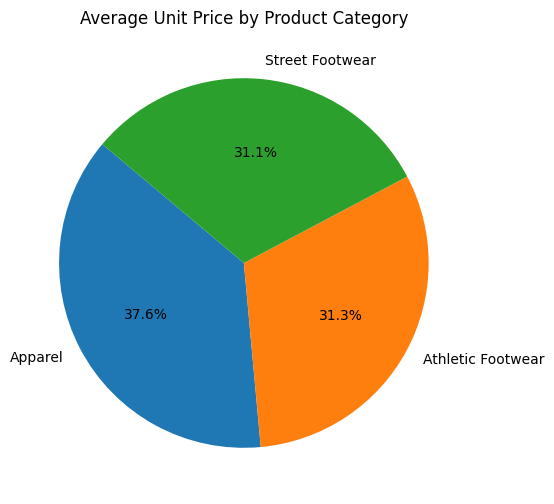

In [ ]:
avg_price_per_category = sales.groupby('Product Category')['Price per Unit'].mean()
# Pie Chart
plt.figure(figsize=(8, 6))
plt.pie(avg_price_per_category, labels=avg_price_per_category.index, autopct='%1.1f%%', startangle=140)
plt.title("Average Unit Price by Product Category")
plt.show()

<ipython-input-19-911114de1bf5>:19: UserWarning: shading value 'inferno' not in list of valid values ['gouraud', 'nearest', 'flat', 'auto']. Setting shading='auto'.
  plt.pcolormesh(times, frequencies, Sxx, shading='inferno', cmap='viridis')


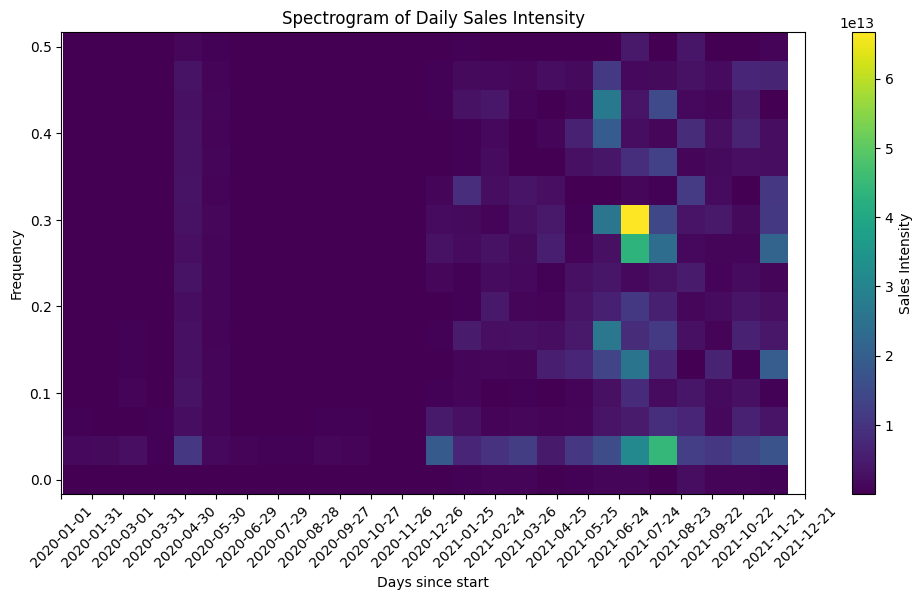

In [ ]:

# Load the dataset
file_path = '/content/drive/MyDrive/Colab Notebooks/AdidasSalesdata.xlsx'
sales = pd.read_excel(file_path, sheet_name='Sales_details')

# Convert 'Invoice Date' to datetime format
sales['Invoice Date'] = pd.to_datetime(sales['Invoice Date'])

# Aggregate daily sales data
daily_sales = sales.groupby('Invoice Date')['Total Sales'].sum()

# Resample to fill any missing dates with 0 sales
daily_sales = daily_sales.asfreq('D').fillna(0)

# Generate a spectrogram-like plot using a sliding window
frequencies, times, Sxx = spectrogram(daily_sales.values, fs=1, nperseg=30)

# Plot the spectrogram-like sales intensity
plt.figure(figsize=(12, 6))
plt.pcolormesh(times, frequencies, Sxx, shading='inferno', cmap='viridis')
plt.colorbar(label='Sales Intensity')
plt.title('Spectrogram of Daily Sales Intensity')
plt.xlabel('Days since start')
plt.ylabel('Frequency')

# Set x-axis labels to show dates
date_labels = daily_sales.index[::30].strftime('%Y-%m-%d')
plt.xticks(ticks=np.arange(0, len(daily_sales), 30), labels=date_labels, rotation=45)
plt.show()


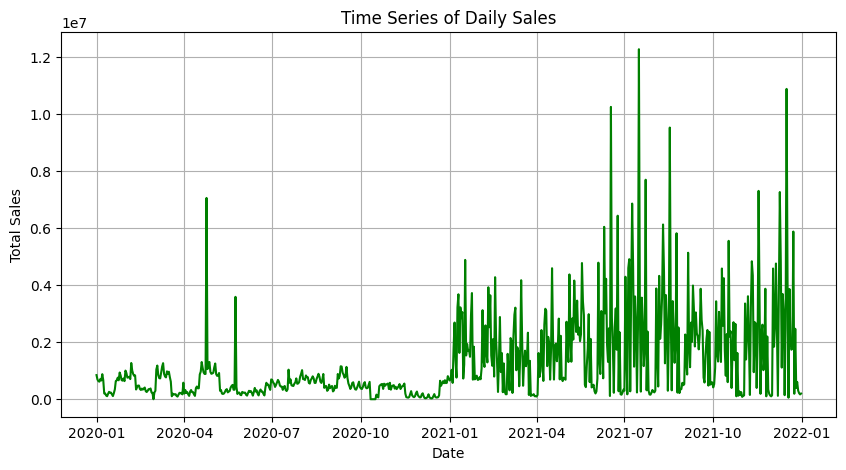

In [ ]:
# 1. Time Series Plot
plt.figure(figsize=(10, 5))
plt.plot(daily_sales, color='green')
plt.title('Time Series of Daily Sales')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
print("\n--- Preparing Data for Linear Regression ---")


--- Preparing Data for Linear Regression ---


# Feature Engineering

# Extract time-based features from the 'Invoice Date'

In [7]:
sales['Year'] = sales['Invoice Date'].dt.year
sales['Month'] = sales['Invoice Date'].dt.month
sales['Day'] = sales['Invoice Date'].dt.day

#  Feature Selection & Preprocessing

In [9]:
target = 'Total Sales'

# We exclude columns that would cause data leakage or are identifiers

In [13]:
features = ['Retailer', 'Region', 'Price per Unit', 'Units Sold', 'Sales Method', 'Year', 'Month', 'Day']
X = sales[features]
y = sales[target]

# Identify categorical and numerical features for the pipeline


In [14]:
categorical_features = ['Retailer', 'Region', 'Sales Method']
numerical_features = ['Price per Unit', 'Units Sold', 'Year', 'Month', 'Day']

# Create a preprocessing pipeline to scale numerical data and one-hot encode categorical data

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# --- Model Training and Evaluation ---

# Split the data into training (80%) and testing (20%) sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the full pipeline with the preprocessor and the Linear Regression model

In [17]:
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Train the model

In [18]:
print("\n--- Training the Linear Regression model ---")
lr_pipeline.fit(X_train, y_train)
print("Model training complete.")


--- Training the Linear Regression model ---
Model training complete.



# Make predictions on the test set

In [19]:
y_pred = lr_pipeline.predict(X_test)

# --- Model Evaluation & Interpretation ---

In [24]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


In [25]:
print("\n--- Linear Regression Model Evaluation Results ---")
print(f"Root Mean Squared Error (RMSE): ${rmse:,.2f}")
print(f"R-squared (R²): {r2:.4f}")


--- Linear Regression Model Evaluation Results ---
Root Mean Squared Error (RMSE): $47,088.97
R-squared (R²): 0.8907


# Extract and display feature coefficients to understand their impact

In [26]:
print("\n--- Interpreting Model Coefficients ---")
encoded_feature_names = lr_pipeline.named_steps['preprocessor'].get_feature_names_out()
coefficients = lr_pipeline.named_steps['regressor'].coef_


--- Interpreting Model Coefficients ---


In [27]:
coeff_df = pd.DataFrame(coefficients, index=encoded_feature_names, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)
print("The coefficient represents the change in sales for a one-unit change in the feature.")
print(coeff_df)

The coefficient represents the change in sales for a one-unit change in the feature.
                               Coefficient
num__Units Sold              121468.379149
num__Price per Unit           30300.643394
cat__Sales Method_In-store    17518.023134
cat__Region_Midwest           15272.057502
num__Year                      8325.544157
cat__Retailer_Amazon           5915.663845
cat__Retailer_West Gear        5333.420038
cat__Retailer_Foot Locker      5166.837166
cat__Region_Northeast          3928.034000
num__Day                       2546.888351
num__Month                      -87.408249
cat__Region_South             -3810.772265
cat__Region_West              -4269.977286
cat__Retailer_Walmart         -4334.419766
cat__Sales Method_Outlet      -4742.918436
cat__Retailer_Sports Direct   -5157.438132
cat__Retailer_Kohl's          -6924.063151
cat__Region_Southeast        -11119.341951
cat__Sales Method_Online     -12775.104698


In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
print("\n\n--- Preparing Data for Random Forest Model ---")



--- Preparing Data for Random Forest Model ---


In [30]:
target = 'Total Sales'
features = ['Retailer', 'Region', 'Price per Unit', 'Units Sold', 'Sales Method', 'Year', 'Month', 'Day']
X = sales[features]
y = sales[target]

# Identify categorical and numerical features

In [31]:
categorical_features = ['Retailer', 'Region', 'Sales Method']
numerical_features = ['Price per Unit', 'Units Sold', 'Year', 'Month', 'Day']


# Create the same preprocessing pipeline

In [32]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])


# --- 3. Model Training & Evaluation ---

# Split data into training and testing sets

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the full pipeline with the preprocessor and the Random Forest Regressor model

In [34]:
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))])



# Train the model

In [35]:
print("\n--- Training the Random Forest model ---")
rf_pipeline.fit(X_train, y_train)
print("Model training complete.")



--- Training the Random Forest model ---
Model training complete.


# Make predictions on the test set

In [36]:
y_pred_rf = rf_pipeline.predict(X_test)


# --- 4. Model Evaluation & Feature Importance ---

In [37]:
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [38]:
print("\n--- Random Forest Model Evaluation Results ---")
print(f"Root Mean Squared Error (RMSE): ${rmse_rf:,.2f}")
print(f"R-squared (R²): {r2_rf:.4f}")



--- Random Forest Model Evaluation Results ---
Root Mean Squared Error (RMSE): $8,697.75
R-squared (R²): 0.9963


# Extract feature importances from the model

In [39]:
encoded_feature_names_rf = rf_pipeline.named_steps['preprocessor'].get_feature_names_out()
importances_rf = rf_pipeline.named_steps['regressor'].feature_importances_


# Create a DataFrame for better visualization

In [40]:
feature_importance_df_rf = pd.DataFrame({'Feature': encoded_feature_names_rf, 'Importance': importances_rf}).sort_values(by='Importance', ascending=False)

# Plot feature importances


--- Interpreting Feature Importances ---


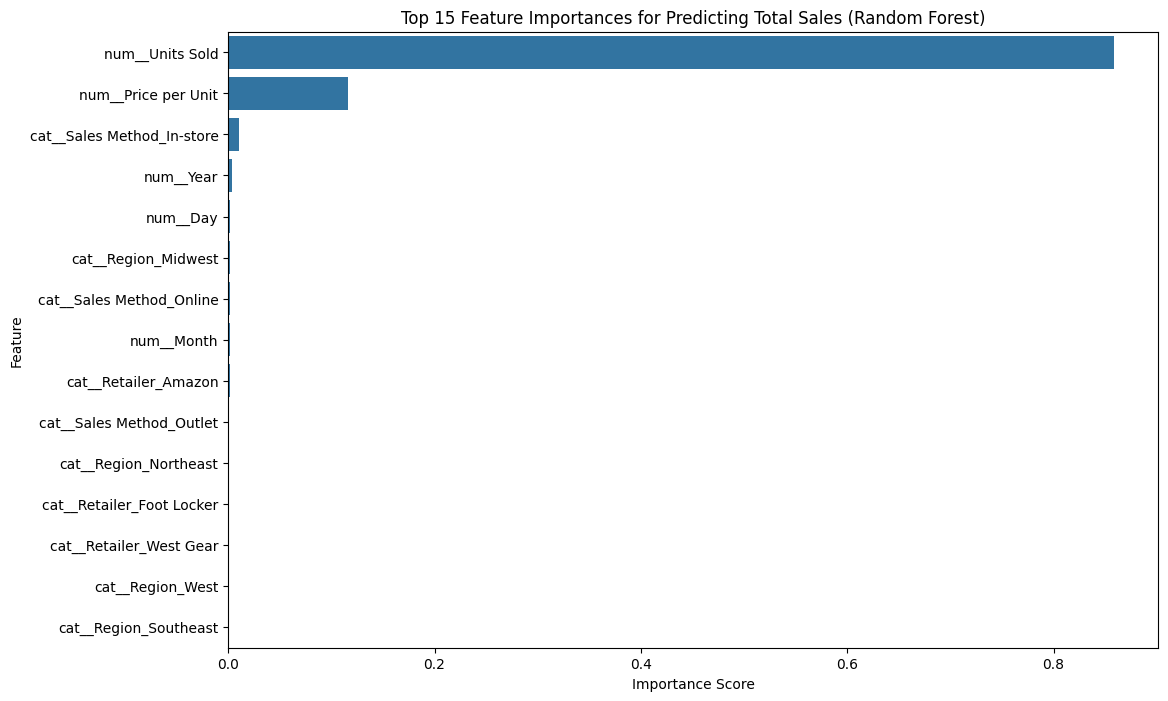

In [41]:
print("\n--- Interpreting Feature Importances ---")
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_rf.head(15)) # Top 15 features
plt.title('Top 15 Feature Importances for Predicting Total Sales (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()